<a href="https://colab.research.google.com/github/Divyasnj/machine-learning/blob/main/mlalgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

# Sample dataset
X = np.array([1, 2, 3, 4, 5])
Y = np.array([3, 4, 2, 5, 6])   # kinda near y = 1*x + 2

# Initialize parameters
m, b = 0, 0
lr = 0.01
epochs = 1000
n = len(X)

# Training loop
for _ in range(epochs):
    Y_pred = m*X + b

    # Gradients
    dm = -(2/n) * sum(X * (Y - Y_pred))
    db = -(2/n) * sum(Y - Y_pred)

    # Update
    m -= lr * dm
    b -= lr * db

print(f"Final equation: y = {m:.2f}x + {b:.2f}")


Final equation: y = 0.71x + 1.85


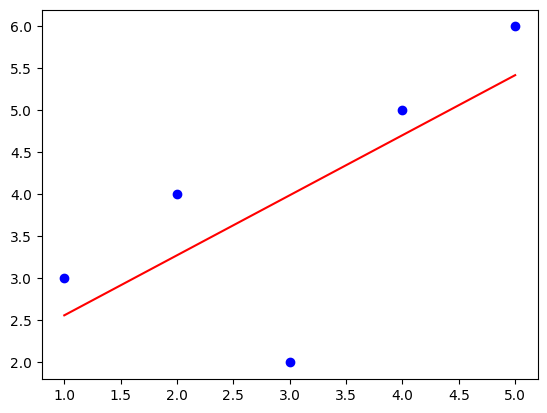

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, color="blue")            # data points
plt.plot(X, m*X + b, color="red")          # fitted line
plt.show()


In [1]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Dataset
X = np.array([0.5, 1.3, 2.1, 2.9, 3.5, 4.2, 5.0, 6.0])
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Parameters
m, b = 0, 0
lr = 0.1
epochs = 1000
n = len(X)

# Training loop
for _ in range(epochs):
    # Prediction (probabilities)
    Z = m*X + b
    P = sigmoid(Z)

    # Gradients
    dm = (1/n) * np.dot(X, (P - Y))
    db = (1/n) * np.sum(P - Y)

    # Update
    m -= lr * dm
    b -= lr * db

print(f"Final model: p = sigmoid({m:.2f}*x + {b:.2f})")

# Predictions
test = np.array([1.0, 2.5, 4.0, 5.5])
pred_probs = sigmoid(m*test + b)
pred_classes = (pred_probs >= 0.5).astype(int)

print("Test probs:", pred_probs)
print("Test predictions:", pred_classes)


Final model: p = sigmoid(1.78*x + -5.42)
Test probs: [0.02569842 0.27634458 0.8468308  0.98766109]
Test predictions: [0 0 1 1]


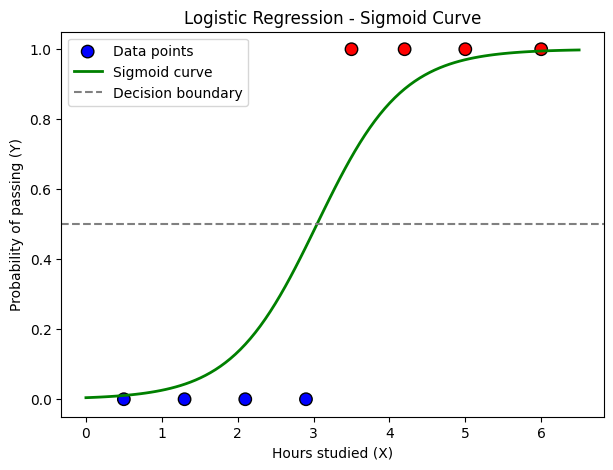

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Dataset
X = np.array([0.5, 1.3, 2.1, 2.9, 3.5, 4.2, 5.0, 6.0])
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Parameters (trained from before)
m, b = 1.78, -5.42   # Example values from training output

# Plot sigmoid curve
x_vals = np.linspace(0, 6.5, 100)
y_probs = sigmoid(m*x_vals + b)

plt.figure(figsize=(7,5))

# Data points
plt.scatter(X, Y, c=Y, cmap="bwr", edgecolor="k", s=80, label="Data points")

# Sigmoid curve
plt.plot(x_vals, y_probs, color="green", linewidth=2, label="Sigmoid curve")

# Decision boundary (p=0.5 line)
plt.axhline(0.5, color="gray", linestyle="--", label="Decision boundary")

plt.xlabel("Hours studied (X)")
plt.ylabel("Probability of passing (Y)")
plt.title("Logistic Regression - Sigmoid Curve")
plt.legend()
plt.show()


In [3]:
import numpy as np

# Dataset
X = np.array([1,2,3])
Y = np.array([2,3,5])

# Parameters
m, b = 0, 0
lr = 0.01
epochs = 1000
lambda_ridge = 0.1
n = len(X)

# Training loop
for _ in range(epochs):
    Y_pred = m*X + b

    # Gradients
    dm = (-2/n) * np.dot(X, (Y - Y_pred)) + 2*lambda_ridge*m
    db = (-2/n) * np.sum(Y - Y_pred)   # bias is not regularized

    # Update
    m -= lr * dm
    b -= lr * db

print(f"Ridge Regression Model: y = {m:.2f}x + {b:.2f}")

# Predictions
test = np.array([4,5])
pred = m*test + b
print("Predictions:", pred)


Ridge Regression Model: y = 1.31x + 0.72
Predictions: [5.94849864 7.25668659]


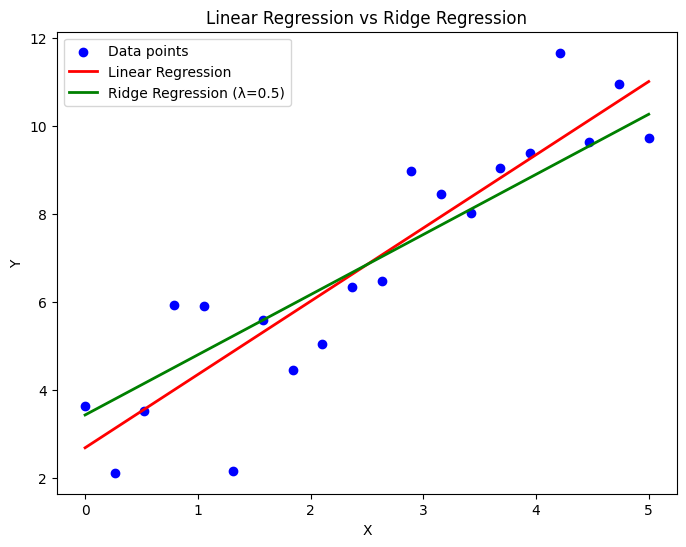

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create noisy dataset
np.random.seed(0)
X = np.linspace(0, 5, 20)
Y = 2*X + 1 + np.random.randn(20) * 1.5   # True line: y=2x+1 + noise

# Linear Regression (from scratch)
m_lr, b_lr = 0, 0
lr = 0.01
epochs = 1000
n = len(X)

for _ in range(epochs):
    Y_pred = m_lr*X + b_lr
    dm = (-2/n) * np.dot(X, (Y - Y_pred))
    db = (-2/n) * np.sum(Y - Y_pred)
    m_lr -= lr * dm
    b_lr -= lr * db

# Ridge Regression (λ = 0.5)
m_ridge, b_ridge = 0, 0
lambda_ridge = 0.5

for _ in range(epochs):
    Y_pred = m_ridge*X + b_ridge
    dm = (-2/n) * np.dot(X, (Y - Y_pred)) + 2*lambda_ridge*m_ridge
    db = (-2/n) * np.sum(Y - Y_pred)
    m_ridge -= lr * dm
    b_ridge -= lr * db

# Plotting
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, m_lr*X + b_lr, color='red', linewidth=2, label='Linear Regression')
plt.plot(X, m_ridge*X + b_ridge, color='green', linewidth=2, label='Ridge Regression (λ=0.5)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression vs Ridge Regression')
plt.legend()
plt.show()


In [5]:
import numpy as np

# Dataset
X = np.array([1,2,3])
Y = np.array([2,3,5])

# Parameters
m, b = 0, 0
lr = 0.01
epochs = 1000
lambda_lasso = 0.1
n = len(X)

# Training loop
for _ in range(epochs):
    Y_pred = m*X + b

    # Gradients
    dm = (-2/n) * np.dot(X, (Y - Y_pred)) + lambda_lasso * np.sign(m)
    db = (-2/n) * np.sum(Y - Y_pred)

    # Update
    m -= lr * dm
    b -= lr * db

print(f"Lasso Regression Model: y = {m:.2f}x + {b:.2f}")

# Predictions
test = np.array([4,5])
pred = m*test + b
print("Predictions:", pred)


Lasso Regression Model: y = 1.42x + 0.49
Predictions: [6.17512818 7.59537643]


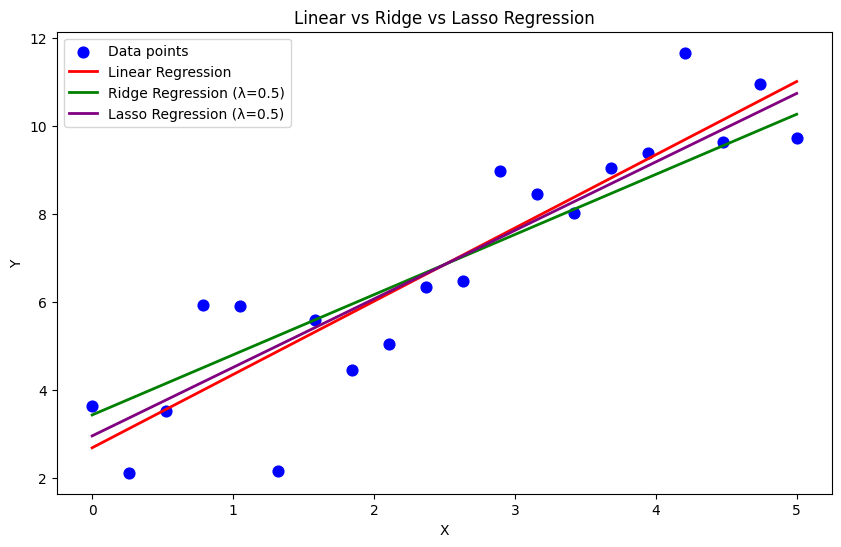

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create noisy dataset
np.random.seed(0)
X = np.linspace(0, 5, 20)
Y = 2*X + 1 + np.random.randn(20) * 1.5  # True line: y=2x+1 + noise

# Common parameters
lr = 0.01
epochs = 1000
n = len(X)

# ---------------- Linear Regression ----------------
m_lr, b_lr = 0, 0
for _ in range(epochs):
    Y_pred = m_lr*X + b_lr
    dm = (-2/n) * np.dot(X, (Y - Y_pred))
    db = (-2/n) * np.sum(Y - Y_pred)
    m_lr -= lr * dm
    b_lr -= lr * db

# ---------------- Ridge Regression ----------------
m_ridge, b_ridge = 0, 0
lambda_ridge = 0.5
for _ in range(epochs):
    Y_pred = m_ridge*X + b_ridge
    dm = (-2/n) * np.dot(X, (Y - Y_pred)) + 2*lambda_ridge*m_ridge
    db = (-2/n) * np.sum(Y - Y_pred)
    m_ridge -= lr * dm
    b_ridge -= lr * db

# ---------------- Lasso Regression ----------------
m_lasso, b_lasso = 0, 0
lambda_lasso = 0.5
for _ in range(epochs):
    Y_pred = m_lasso*X + b_lasso
    dm = (-2/n) * np.dot(X, (Y - Y_pred)) + lambda_lasso * np.sign(m_lasso)
    db = (-2/n) * np.sum(Y - Y_pred)
    m_lasso -= lr * dm
    b_lasso -= lr * db

# ---------------- Plotting ----------------
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue', label='Data points', s=60)

# Plot each regression line
plt.plot(X, m_lr*X + b_lr, color='red', linewidth=2, label='Linear Regression')
plt.plot(X, m_ridge*X + b_ridge, color='green', linewidth=2, label='Ridge Regression (λ=0.5)')
plt.plot(X, m_lasso*X + b_lasso, color='purple', linewidth=2, label='Lasso Regression (λ=0.5)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear vs Ridge vs Lasso Regression')
plt.legend()
plt.show()


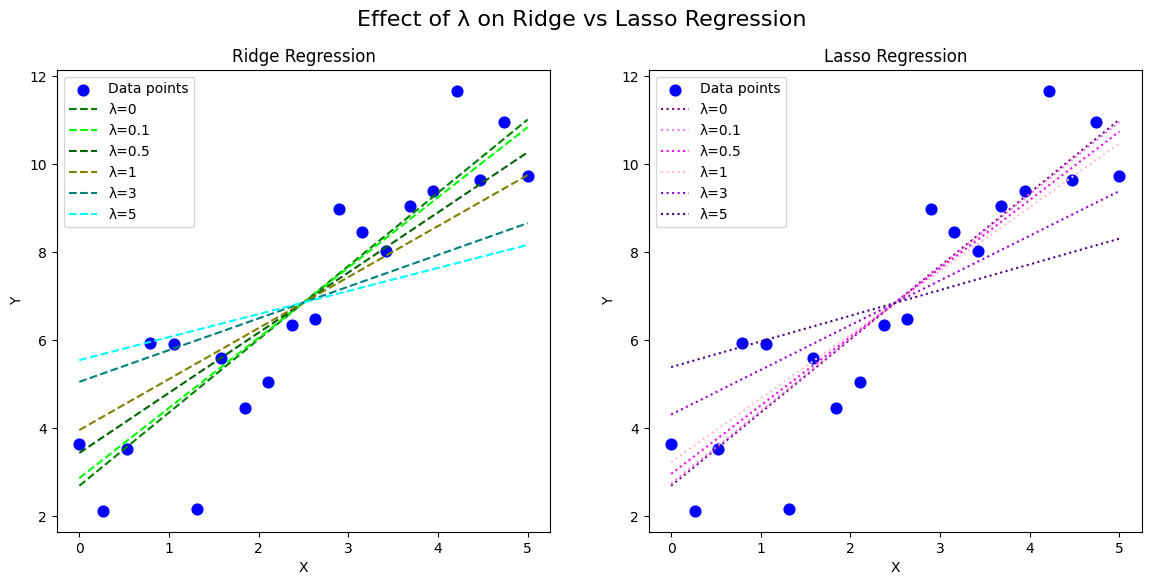

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
np.random.seed(0)
X = np.linspace(0, 5, 20)
Y = 2*X + 1 + np.random.randn(20) * 1.5  # True line y=2x+1 + noise
n = len(X)
lr = 0.01
epochs = 1000

# Function to train Ridge
def train_ridge(lambda_ridge):
    m, b = 0, 0
    for _ in range(epochs):
        Y_pred = m*X + b
        dm = (-2/n) * np.dot(X, (Y - Y_pred)) + 2*lambda_ridge*m
        db = (-2/n) * np.sum(Y - Y_pred)
        m -= lr * dm
        b -= lr * db
    return m, b

# Function to train Lasso
def train_lasso(lambda_lasso):
    m, b = 0, 0
    for _ in range(epochs):
        Y_pred = m*X + b
        dm = (-2/n) * np.dot(X, (Y - Y_pred)) + lambda_lasso * np.sign(m)
        db = (-2/n) * np.sum(Y - Y_pred)
        m -= lr * dm
        b -= lr * db
    return m, b

# λ values
lambdas = [0, 0.1, 0.5, 1, 3, 5]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# ----------- Ridge Subplot -----------
ax1.scatter(X, Y, color='blue', s=60, label='Data points')
colors = ['green', 'lime', 'darkgreen', 'olive', 'teal', 'cyan']
for i, l in enumerate(lambdas):
    m, b = train_ridge(l)
    ax1.plot(X, m*X + b, color=colors[i], linestyle='--', label=f'λ={l}')
ax1.set_title('Ridge Regression')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

# ----------- Lasso Subplot -----------
ax2.scatter(X, Y, color='blue', s=60, label='Data points')
colors = ['purple', 'violet', 'magenta', 'pink', 'darkviolet', 'indigo']
for i, l in enumerate(lambdas):
    m, b = train_lasso(l)
    ax2.plot(X, m*X + b, color=colors[i], linestyle=':', label=f'λ={l}')
ax2.set_title('Lasso Regression')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()

plt.suptitle('Effect of λ on Ridge vs Lasso Regression', fontsize=16)
plt.show()
